# Investigation into the Convergence Rate (with $M$) of the Variational Problem to the Dirichlet Eigenvalues

The Dirichlet eigenvalues are $\omega_{n,m}^2=(n^2+m^2)\pi^2$ and the eigenfunctions occur when both of:
- $n$ is even and $\theta_1=0$ OR $n$ is odd and $\theta_1=-\pi$,
- $m$ is even and $\theta_2=0$ OR $m$ is odd and $\theta_2=-\pi$.

We want to check how accurate the VP is at computing these eigenfunctions, as we increase the dimension of our approximating subspace, $M$.
Annoyingly, each investigation will require us to compute _all_ the eigenfunctions up to and including $\omega_{n,m}$ --- considerably costly for us!

A crude estimation from the FDM method implies that we **should** find the Dirichlet eigenvalue $\omega_{1,1}$ in around the 5th band (the bands tend to shrink as the number increases, but we might be able to get away with the 4th).
For a given $M$, we can only compute $M(M-2)$ eigenvalues due to the number of free variables and constraints in the problem --- this means we must start at a minimum $M=6$ to reach band 20.

In [1]:
from datetime import datetime

import numpy as np
from numpy import pi

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from mpl_toolkits.axes_grid1 import make_axes_locatable

from CompMes_VarProb import GlobalVarProbSolve, Real2Comp, Poly2D

In [2]:
# get timestamp for saving plots later
now = './VP_Results/' + 'VP_' + datetime.today().strftime('%Y-%m-%d-%H-%M')
# define the analytic constants here
n = 1
m = 1
# derive values from n,m
lbda = (n*n + m*m)*pi*pi
omega = np.sqrt(lbda)    
# set the quasi-momentum to the fixed value
theta = -np.pi * np.ones((2,), dtype=float)
if n%2==0:
    theta[0] = 0.
if m%2==0:
    theta[1] = 0.
    
# only compute this many eigenvalues per run. We can check if we ``overshot" the limit I guess...
maxBand = 4
# range of M to compute over... computation time is VERY long for M>10
minM = 6
maxM = 17
MRange = np.arange(minM, maxM+1, 1, dtype=int)

# for each M, store ALL the computed eigenvalues
# we could also store all the eigenfunctions, which we might as well I guess
eVals = np.zeros((maxM-minM+1,maxBand),dtype=float) # [i,j] = eigenvalue j computed with M=M[i]
eFuncs = [] # list entry i will be run with M[i], storing prevUs for this run

# solver options
nIts = 25
nInner = 2500

In [3]:
for M in MRange:
    # check whether it is possible for us to compute this many eigenvalues!
    if M*(M-2) < maxBand:
        print('  Cannot solve M=%d for %d eigenvalues! M(M-2) = %d' % (M, maxBand, M*(M-2)))
        # move onto next value of M
        continue
    else:
        # we can solve for this many eigenvalues, in theory...
        print('   SOLVING M=%d    ' % M)
        # solve the VP problem up to maxBand, with this value of M.
        uStore, sqEv, conFlag = GlobalVarProbSolve(M, maxBand, theta, nIts=nIts, nIts_inner=nInner, lOff=False)
        # store eigenfunctions that were found as arrays rather than Poly2Ds
        eFuncs.append(uStore)
        eVals[M-minM,:] = np.sqrt(sqEv)
        if conFlag!=-1:
            print('WARNING: Convergence fail for M=%d' % M)

   SOLVING M=6    
Beginning solve 0 + [n]...
 ----- 
 0 + [0] 
basinhopping step 0: f 11.9396
basinhopping step 1: f 11.8506 trial_f 11.8506 accepted 1  lowest_f 11.8506
found new global minimum on step 1 with function value 11.8506
basinhopping step 2: f 11.8393 trial_f 11.8393 accepted 1  lowest_f 11.8393
found new global minimum on step 2 with function value 11.8393
basinhopping step 3: f 11.8427 trial_f 11.8427 accepted 1  lowest_f 11.8393
basinhopping step 4: f 11.8383 trial_f 11.8383 accepted 1  lowest_f 11.8383
found new global minimum on step 4 with function value 11.8383
basinhopping step 5: f 11.8386 trial_f 11.8386 accepted 1  lowest_f 11.8383
basinhopping step 6: f 11.8382 trial_f 11.8382 accepted 1  lowest_f 11.8382
found new global minimum on step 6 with function value 11.8382
basinhopping step 7: f 11.8483 trial_f 11.8483 accepted 1  lowest_f 11.8382
basinhopping step 8: f 11.8381 trial_f 11.8381 accepted 1  lowest_f 11.8381
found new global minimum on step 8 with funct

basinhopping step 10: f 20.4488 trial_f 20.4488 accepted 1  lowest_f 20.4468
basinhopping step 11: f 20.4651 trial_f 20.4651 accepted 1  lowest_f 20.4468
basinhopping step 12: f 20.4586 trial_f 20.4586 accepted 1  lowest_f 20.4468
Runtime: approx 0 mins (28.611618280410767 seconds) 
 -----
   SOLVING M=7    
Beginning solve 0 + [n]...
 ----- 
 0 + [0] 
basinhopping step 0: f 11.8139
basinhopping step 1: f 11.8183 trial_f 11.8183 accepted 1  lowest_f 11.8139
basinhopping step 2: f 11.8155 trial_f 11.8155 accepted 1  lowest_f 11.8139
basinhopping step 3: f 11.8092 trial_f 11.8092 accepted 1  lowest_f 11.8092
found new global minimum on step 3 with function value 11.8092
basinhopping step 4: f 11.8084 trial_f 11.8084 accepted 1  lowest_f 11.8084
found new global minimum on step 4 with function value 11.8084
basinhopping step 5: f 11.8075 trial_f 11.8075 accepted 1  lowest_f 11.8075
found new global minimum on step 5 with function value 11.8075
basinhopping step 6: f 11.8083 trial_f 11.808

basinhopping step 13: f 20.5389 trial_f 20.5389 accepted 1  lowest_f 20.4897
basinhopping step 14: f 20.5571 trial_f 20.5571 accepted 1  lowest_f 20.4897
basinhopping step 15: f 20.0813 trial_f 20.0813 accepted 1  lowest_f 20.0813
found new global minimum on step 15 with function value 20.0813
basinhopping step 16: f 20.1459 trial_f 20.1459 accepted 1  lowest_f 20.0813
basinhopping step 17: f 20.1138 trial_f 20.1138 accepted 1  lowest_f 20.0813
basinhopping step 18: f 20.1501 trial_f 20.1501 accepted 1  lowest_f 20.0813
basinhopping step 19: f 20.1515 trial_f 20.1515 accepted 1  lowest_f 20.0813
basinhopping step 20: f 20.2376 trial_f 20.2376 accepted 1  lowest_f 20.0813
basinhopping step 21: f 20.067 trial_f 20.067 accepted 1  lowest_f 20.067
found new global minimum on step 21 with function value 20.067
basinhopping step 22: f 20.0303 trial_f 20.0303 accepted 1  lowest_f 20.0303
found new global minimum on step 22 with function value 20.0303
basinhopping step 23: f 20.1524 trial_f 20

basinhopping step 11: f 12.9122 trial_f 12.9122 accepted 1  lowest_f 12.9099
basinhopping step 12: f 12.9151 trial_f 12.9151 accepted 1  lowest_f 12.9099
basinhopping step 13: f 12.9167 trial_f 12.9167 accepted 1  lowest_f 12.9099
basinhopping step 14: f 12.9108 trial_f 12.9108 accepted 1  lowest_f 12.9099
basinhopping step 15: f 12.9073 trial_f 12.9073 accepted 1  lowest_f 12.9073
found new global minimum on step 15 with function value 12.9073
basinhopping step 16: f 12.906 trial_f 12.906 accepted 1  lowest_f 12.906
found new global minimum on step 16 with function value 12.906
basinhopping step 17: f 12.9084 trial_f 12.9084 accepted 1  lowest_f 12.906
basinhopping step 18: f 12.9162 trial_f 12.9162 accepted 1  lowest_f 12.906
basinhopping step 19: f 12.9068 trial_f 12.9068 accepted 1  lowest_f 12.906
basinhopping step 20: f 12.9033 trial_f 12.9033 accepted 1  lowest_f 12.9033
found new global minimum on step 20 with function value 12.9033
basinhopping step 21: f 12.9027 trial_f 12.90

basinhopping step 14: f 12.8604 trial_f 12.8604 accepted 1  lowest_f 12.8586
basinhopping step 15: f 12.8652 trial_f 12.8652 accepted 1  lowest_f 12.8586
basinhopping step 16: f 12.8576 trial_f 12.8576 accepted 1  lowest_f 12.8576
found new global minimum on step 16 with function value 12.8576
basinhopping step 17: f 12.8598 trial_f 12.8598 accepted 1  lowest_f 12.8576
basinhopping step 18: f 12.8579 trial_f 12.8579 accepted 1  lowest_f 12.8576
basinhopping step 19: f 12.8578 trial_f 12.8578 accepted 1  lowest_f 12.8576
basinhopping step 20: f 12.8573 trial_f 12.8573 accepted 1  lowest_f 12.8573
found new global minimum on step 20 with function value 12.8573
basinhopping step 21: f 12.8564 trial_f 12.8564 accepted 1  lowest_f 12.8564
found new global minimum on step 21 with function value 12.8564
basinhopping step 22: f 12.8564 trial_f 12.8564 accepted 1  lowest_f 12.8564
basinhopping step 23: f 12.8566 trial_f 12.8566 accepted 1  lowest_f 12.8564
basinhopping step 24: f 12.8564 trial_

basinhopping step 6: f 11.7669 trial_f 11.7669 accepted 1  lowest_f 11.7662
basinhopping step 7: f 11.7657 trial_f 11.7657 accepted 1  lowest_f 11.7657
found new global minimum on step 7 with function value 11.7657
basinhopping step 8: f 11.7659 trial_f 11.7659 accepted 1  lowest_f 11.7657
basinhopping step 9: f 11.7651 trial_f 11.7651 accepted 1  lowest_f 11.7651
found new global minimum on step 9 with function value 11.7651
basinhopping step 10: f 11.7653 trial_f 11.7653 accepted 1  lowest_f 11.7651
basinhopping step 11: f 11.7656 trial_f 11.7656 accepted 1  lowest_f 11.7651
basinhopping step 12: f 11.7649 trial_f 11.7649 accepted 1  lowest_f 11.7649
found new global minimum on step 12 with function value 11.7649
basinhopping step 13: f 11.7648 trial_f 11.7648 accepted 1  lowest_f 11.7648
found new global minimum on step 13 with function value 11.7648
basinhopping step 14: f 11.7648 trial_f 11.7648 accepted 1  lowest_f 11.7648
basinhopping step 15: f 11.7652 trial_f 11.7652 accepted 

basinhopping step 4: f 20.1001 trial_f 20.1001 accepted 1  lowest_f 20.1001
found new global minimum on step 4 with function value 20.1001
basinhopping step 5: f 20.1061 trial_f 20.1061 accepted 1  lowest_f 20.1001
basinhopping step 6: f 20.1026 trial_f 20.1026 accepted 1  lowest_f 20.1001
basinhopping step 7: f 20.0977 trial_f 20.0977 accepted 1  lowest_f 20.0977
found new global minimum on step 7 with function value 20.0977
basinhopping step 8: f 20.0983 trial_f 20.0983 accepted 1  lowest_f 20.0977
basinhopping step 9: f 20.0984 trial_f 20.0984 accepted 1  lowest_f 20.0977
basinhopping step 10: f 20.0951 trial_f 20.0951 accepted 1  lowest_f 20.0951
found new global minimum on step 10 with function value 20.0951
basinhopping step 11: f 20.0947 trial_f 20.0947 accepted 1  lowest_f 20.0947
found new global minimum on step 11 with function value 20.0947
basinhopping step 12: f 20.0978 trial_f 20.0978 accepted 1  lowest_f 20.0947
basinhopping step 13: f 20.0927 trial_f 20.0927 accepted 1 

basinhopping step 23: f 12.846 trial_f 12.846 accepted 1  lowest_f 12.8452
basinhopping step 24: f 12.846 trial_f 12.846 accepted 1  lowest_f 12.8452
basinhopping step 25: f 12.8452 trial_f 12.8452 accepted 1  lowest_f 12.8452
Runtime: approx 1 mins (82.86290550231934 seconds) 
 -----
 ----- 
 0 + [2]
basinhopping step 0: f 13.0117
basinhopping step 1: f 13.0092 trial_f 13.0092 accepted 1  lowest_f 13.0092
found new global minimum on step 1 with function value 13.0092
basinhopping step 2: f 13.0067 trial_f 13.0067 accepted 1  lowest_f 13.0067
found new global minimum on step 2 with function value 13.0067
basinhopping step 3: f 13.0052 trial_f 13.0052 accepted 1  lowest_f 13.0052
found new global minimum on step 3 with function value 13.0052
basinhopping step 4: f 13.0037 trial_f 13.0037 accepted 1  lowest_f 13.0037
found new global minimum on step 4 with function value 13.0037
basinhopping step 5: f 13.0032 trial_f 13.0032 accepted 1  lowest_f 13.0032
found new global minimum on step 5

basinhopping step 13: f 11.7762 trial_f 11.7762 accepted 1  lowest_f 11.7762
found new global minimum on step 13 with function value 11.7762
basinhopping step 14: f 11.7764 trial_f 11.7764 accepted 1  lowest_f 11.7762
basinhopping step 15: f 11.7749 trial_f 11.7749 accepted 1  lowest_f 11.7749
found new global minimum on step 15 with function value 11.7749
basinhopping step 16: f 11.7741 trial_f 11.7741 accepted 1  lowest_f 11.7741
found new global minimum on step 16 with function value 11.7741
basinhopping step 17: f 11.7746 trial_f 11.7746 accepted 1  lowest_f 11.7741
basinhopping step 18: f 11.7741 trial_f 11.7741 accepted 1  lowest_f 11.7741
found new global minimum on step 18 with function value 11.7741
basinhopping step 19: f 11.7728 trial_f 11.7728 accepted 1  lowest_f 11.7728
found new global minimum on step 19 with function value 11.7728
basinhopping step 20: f 11.774 trial_f 11.774 accepted 1  lowest_f 11.7728
basinhopping step 21: f 11.7733 trial_f 11.7733 accepted 1  lowest

basinhopping step 3: f 11.756 trial_f 11.756 accepted 1  lowest_f 11.756
found new global minimum on step 3 with function value 11.756
basinhopping step 4: f 11.7557 trial_f 11.7557 accepted 1  lowest_f 11.7557
found new global minimum on step 4 with function value 11.7557
basinhopping step 5: f 11.759 trial_f 11.759 accepted 1  lowest_f 11.7557
basinhopping step 6: f 11.7558 trial_f 11.7558 accepted 1  lowest_f 11.7557
basinhopping step 7: f 11.7556 trial_f 11.7556 accepted 1  lowest_f 11.7556
found new global minimum on step 7 with function value 11.7556
basinhopping step 8: f 11.7552 trial_f 11.7552 accepted 1  lowest_f 11.7552
found new global minimum on step 8 with function value 11.7552
basinhopping step 9: f 11.7549 trial_f 11.7549 accepted 1  lowest_f 11.7549
found new global minimum on step 9 with function value 11.7549
basinhopping step 10: f 11.7541 trial_f 11.7541 accepted 1  lowest_f 11.7541
found new global minimum on step 10 with function value 11.7541
basinhopping step 

basinhopping step 9: f 19.9204 trial_f 19.9204 accepted 1  lowest_f 19.9182
basinhopping step 10: f 19.9163 trial_f 19.9163 accepted 1  lowest_f 19.9163
found new global minimum on step 10 with function value 19.9163
basinhopping step 11: f 19.9165 trial_f 19.9165 accepted 1  lowest_f 19.9163
basinhopping step 12: f 19.9168 trial_f 19.9168 accepted 1  lowest_f 19.9163
basinhopping step 13: f 19.9155 trial_f 19.9155 accepted 1  lowest_f 19.9155
found new global minimum on step 13 with function value 19.9155
basinhopping step 14: f 19.9178 trial_f 19.9178 accepted 1  lowest_f 19.9155
basinhopping step 15: f 19.9159 trial_f 19.9159 accepted 1  lowest_f 19.9155
basinhopping step 16: f 19.9168 trial_f 19.9168 accepted 1  lowest_f 19.9155
basinhopping step 17: f 19.9145 trial_f 19.9145 accepted 1  lowest_f 19.9145
found new global minimum on step 17 with function value 19.9145
basinhopping step 18: f 19.9165 trial_f 19.9165 accepted 1  lowest_f 19.9145
basinhopping step 19: f 19.9154 trial_f

basinhopping step 18: f 12.9141 trial_f 12.9141 accepted 1  lowest_f 12.9127
Runtime: approx 4 mins (247.24157428741455 seconds) 
 -----
 ----- 
 0 + [3]
basinhopping step 0: f 20.015
basinhopping step 1: f 19.9537 trial_f 19.9537 accepted 1  lowest_f 19.9537
found new global minimum on step 1 with function value 19.9537
basinhopping step 2: f 19.9518 trial_f 19.9518 accepted 1  lowest_f 19.9518
found new global minimum on step 2 with function value 19.9518
basinhopping step 3: f 19.9508 trial_f 19.9508 accepted 1  lowest_f 19.9508
found new global minimum on step 3 with function value 19.9508
basinhopping step 4: f 19.9508 trial_f 19.9508 accepted 1  lowest_f 19.9508
found new global minimum on step 4 with function value 19.9508
basinhopping step 5: f 19.9477 trial_f 19.9477 accepted 1  lowest_f 19.9477
found new global minimum on step 5 with function value 19.9477
basinhopping step 6: f 19.9484 trial_f 19.9484 accepted 1  lowest_f 19.9477
basinhopping step 7: f 19.9479 trial_f 19.947

basinhopping step 20: f 12.8428 trial_f 12.8428 accepted 1  lowest_f 12.8422
basinhopping step 21: f 12.8421 trial_f 12.8421 accepted 1  lowest_f 12.8421
found new global minimum on step 21 with function value 12.8421
basinhopping step 22: f 12.8424 trial_f 12.8424 accepted 1  lowest_f 12.8421
basinhopping step 23: f 12.8422 trial_f 12.8422 accepted 1  lowest_f 12.8421
basinhopping step 24: f 12.8421 trial_f 12.8421 accepted 1  lowest_f 12.8421
basinhopping step 25: f 12.8418 trial_f 12.8418 accepted 1  lowest_f 12.8418
found new global minimum on step 25 with function value 12.8418
Runtime: approx 12 mins (742.5808050632477 seconds) 
 -----
 ----- 
 0 + [2]
basinhopping step 0: f 12.9283
basinhopping step 1: f 12.9265 trial_f 12.9265 accepted 1  lowest_f 12.9265
found new global minimum on step 1 with function value 12.9265
basinhopping step 2: f 12.9239 trial_f 12.9239 accepted 1  lowest_f 12.9239
found new global minimum on step 2 with function value 12.9239
basinhopping step 3: f 1

basinhopping step 4: f 12.8483 trial_f 12.8483 accepted 1  lowest_f 12.8483
found new global minimum on step 4 with function value 12.8483
basinhopping step 5: f 12.849 trial_f 12.849 accepted 1  lowest_f 12.8483
basinhopping step 6: f 12.8507 trial_f 12.8507 accepted 1  lowest_f 12.8483
basinhopping step 7: f 12.85 trial_f 12.85 accepted 1  lowest_f 12.8483
basinhopping step 8: f 12.8468 trial_f 12.8468 accepted 1  lowest_f 12.8468
found new global minimum on step 8 with function value 12.8468
basinhopping step 9: f 12.8448 trial_f 12.8448 accepted 1  lowest_f 12.8448
found new global minimum on step 9 with function value 12.8448
basinhopping step 10: f 12.8446 trial_f 12.8446 accepted 1  lowest_f 12.8446
found new global minimum on step 10 with function value 12.8446
basinhopping step 11: f 12.8409 trial_f 12.8409 accepted 1  lowest_f 12.8409
found new global minimum on step 11 with function value 12.8409
basinhopping step 12: f 12.8418 trial_f 12.8418 accepted 1  lowest_f 12.8409
ba

basinhopping step 24: f 20.0173 trial_f 20.0173 accepted 1  lowest_f 20.0173
found new global minimum on step 24 with function value 20.0173
basinhopping step 25: f 20.0179 trial_f 20.0179 accepted 1  lowest_f 20.0173
Runtime: approx 13 mins (766.3882577419281 seconds) 
 -----
   SOLVING M=17    
Beginning solve 0 + [n]...
 ----- 
 0 + [0] 
basinhopping step 0: f 11.7838
basinhopping step 1: f 11.7787 trial_f 11.7787 accepted 1  lowest_f 11.7787
found new global minimum on step 1 with function value 11.7787
basinhopping step 2: f 11.7779 trial_f 11.7779 accepted 1  lowest_f 11.7779
found new global minimum on step 2 with function value 11.7779
basinhopping step 3: f 11.7744 trial_f 11.7744 accepted 1  lowest_f 11.7744
found new global minimum on step 3 with function value 11.7744
basinhopping step 4: f 11.7737 trial_f 11.7737 accepted 1  lowest_f 11.7737
found new global minimum on step 4 with function value 11.7737
basinhopping step 5: f 11.7736 trial_f 11.7736 accepted 1  lowest_f 11

basinhopping step 25: f 12.9466 trial_f 12.9466 accepted 1  lowest_f 12.9466
found new global minimum on step 25 with function value 12.9466
Runtime: approx 10 mins (610.3062000274658 seconds) 
 -----
 ----- 
 0 + [3]
basinhopping step 0: f 20.1263
basinhopping step 1: f 20.1053 trial_f 20.1053 accepted 1  lowest_f 20.1053
found new global minimum on step 1 with function value 20.1053
basinhopping step 2: f 20.1029 trial_f 20.1029 accepted 1  lowest_f 20.1029
found new global minimum on step 2 with function value 20.1029
basinhopping step 3: f 20.0984 trial_f 20.0984 accepted 1  lowest_f 20.0984
found new global minimum on step 3 with function value 20.0984
basinhopping step 4: f 20.0949 trial_f 20.0949 accepted 1  lowest_f 20.0949
found new global minimum on step 4 with function value 20.0949
basinhopping step 5: f 20.093 trial_f 20.093 accepted 1  lowest_f 20.093
found new global minimum on step 5 with function value 20.093
basinhopping step 6: f 20.094 trial_f 20.094 accepted 1  low

Exceeded omega_{n,m} in runs with M=
[ 6  7  8  9 10 11 12 13 14 15 16 17]


/home/will/anaconda3/envs/PythonBasics/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


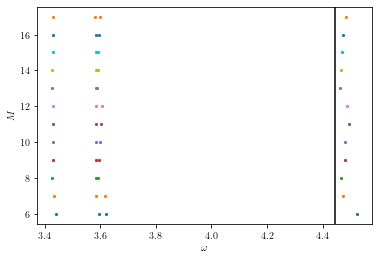

In [4]:
# we now have a record of all the eigenvalues that we found, over all our runs.
# We can (and should) check whether we actually managed to reach the target omega_{n,m} in each of the runs!
maxEvs = np.max(eVals, axis=1)
exceededTarget = maxEvs >= omega
print('Exceeded omega_{n,m} in runs with M=')
print(MRange[exceededTarget])

# now plot the sequence of eigenvalues so we can see where things are going
fig, ax = plt.subplots(1)
ax.set_ylabel(r'$M$')
ax.set_xlabel(r'$\omega$')
ax.axvline(x=omega, c='k')
for M in MRange:
    ax.scatter(eVals[M-minM,:], M*np.ones((maxBand,)), label=r'M=%d' % M, s=5, marker='x')
fig.show()

In [5]:
print(eVals[:,3]-omega)

# needs more global HOPS!

fName = 'VP_ConvInvestiation_' + datetime.today().strftime('%Y-%m-%d-%H-%M') + '.npz'
arr = np.empty(maxM-minM+1, dtype=object)
arr[:] = eFuncs

np.savez(fName, MRange=MRange, n=n, m=m, eVals=eVals, eFs=arr)

[0.07893052 0.03134529 0.02436967 0.036353   0.03808024 0.05067046
 0.04401099 0.01947264 0.02232865 0.027452   0.0311892  0.03963991]


([<Figure size 432x288 with 2 Axes>,
  <AxesSubplot:title={'center':'$\\Re(\\varphi)$, $\\lambda=20.093 $'}, xlabel='$x_1$', ylabel='$x_2$'>],
 [<Figure size 432x288 with 2 Axes>,
  <AxesSubplot:title={'center':'$\\Im(\\varphi)$, $\\lambda=20.093 $'}, xlabel='$x_1$', ylabel='$x_2$'>])

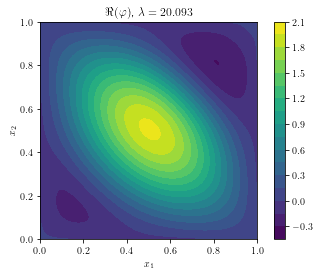

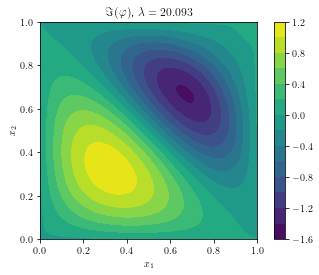

In [6]:
p = Poly2D(theta, Real2Comp(eFuncs[-1][3,:]))

p.plot()